In [1]:
import dask.dataframe as dd
from dask.diagnostics import ProgressBar
from matplotlib import pyplot as plt

df_review = dd.read_csv(
    r'C:\Users\thais\Google Drive\Ciencia de dados e Big data\13.TCC\archive\20191226-reviews.csv')
df_item = dd.read_csv(
    r'C:\Users\thais\Google Drive\Ciencia de dados e Big data\13.TCC\archive\20191226-items.csv')

In [2]:
df_review

,asin,name,rating,date,verified,title,body,helpfulVotes
npartitions=1,,,,,,,,
,object,object,int64,object,bool,object,object,float64
,...,...,...,...,...,...,...,...


In [3]:
df_item

,asin,brand,title,url,image,rating,reviewUrl,totalReviews,price,originalPrice
npartitions=1,,,,,,,,,,
,object,object,object,object,object,float64,object,int64,float64,float64
,...,...,...,...,...,...,...,...,...,...


In [4]:
df=df_review.merge(df_item[['asin', 'brand']])
df=df.dropna(subset=['rating', 'title', 'body','brand'])
df=df.drop(['name','date','verified','title','helpfulVotes'], axis=1)

df

,asin,rating,body,brand
npartitions=1,,,,
,object,int64,object,object
,...,...,...,...


In [5]:
missing_value=df[['rating', 'body', 'brand']].isnull().sum().compute()
print(missing_value)

rating    0
body      0
brand     0
dtype: int64


In [6]:
df=df.dropna(subset=['rating', 'body', 'brand'])

In [7]:
df['opinion']=df['rating'].apply(lambda x: 'positive' if x >= 3 else 'negative', meta=float)

In [8]:
df.groupby(['brand'])['asin'].count().compute()

brand
ASUS          251
Apple        5144
Google       3786
HUAWEI       2225
Motorola     8879
Nokia        5914
OnePlus       347
Samsung     33604
Sony         3195
Xiaomi       4411
Name: asin, dtype: int64

<AxesSubplot:title={'center':'Number of Reviews por Marca'}, xlabel='brand', ylabel='Reviews'>

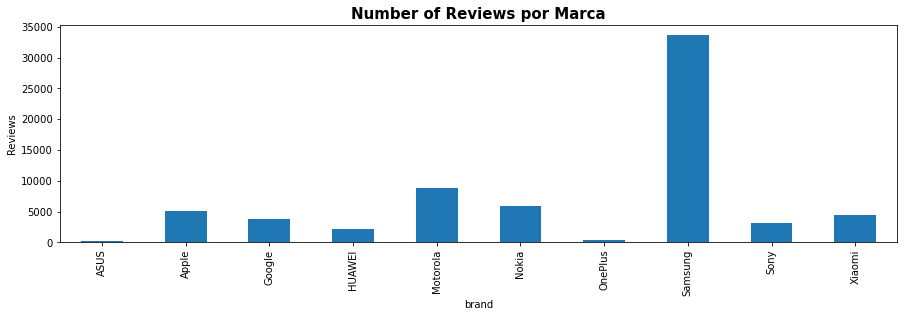

In [9]:
from matplotlib import pyplot as plt

plt.figure(figsize=(15,4))
plt.title("Number of Reviews por Marca", size=15, weight="bold")
plt.xlabel("Brand")
plt.ylabel("Reviews")
df.groupby(['brand'])['asin'].count().compute().plot.bar()

<AxesSubplot:title={'center':'Number of Models by Brand'}, xlabel='brand', ylabel='Reviews'>

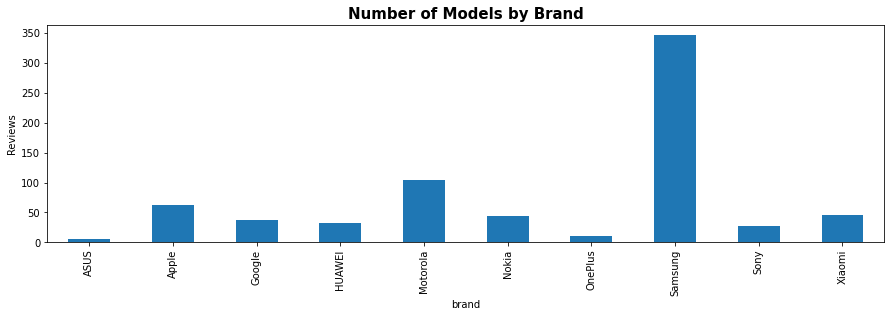

In [10]:
plt.figure(figsize=(15,4))
plt.title("Number of Models by Brand", size=15, weight="bold")
plt.xlabel("Brand")
plt.ylabel("Reviews")
df.groupby(['brand'])['asin'].nunique().compute().plot.bar()

<AxesSubplot:title={'center':'Mean Rate by Brand'}, xlabel='brand', ylabel='Mean Rate'>

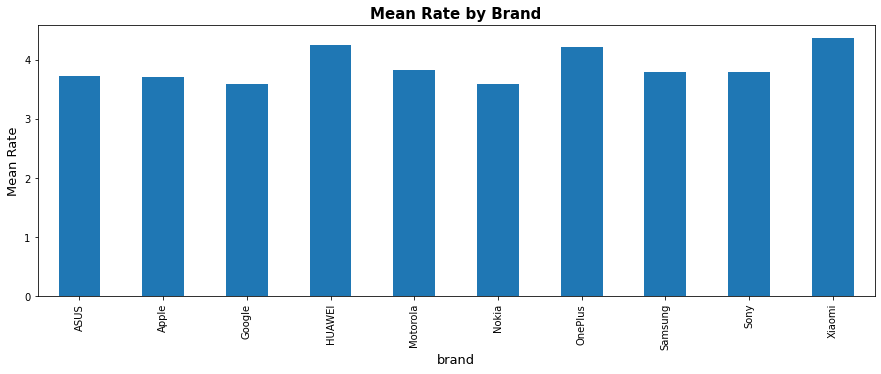

In [11]:
plt.figure(figsize=(15,5))
plt.title("Mean Rate by Brand", size=15, weight="bold")
plt.xlabel("Brand", size=13)
plt.ylabel("Mean Rate", size=13)
df.groupby(['brand'])['rating'].mean().compute().plot.bar()

Text(0, 0.5, 'Rate')

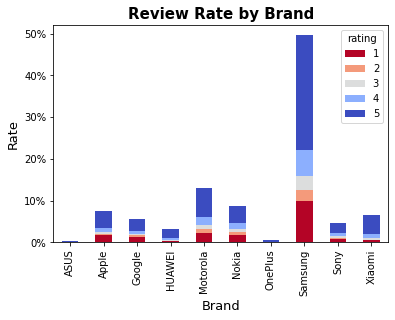

In [12]:
import matplotlib.ticker as mtick

color_map = plt.cm.get_cmap('coolwarm')
df.groupby(['brand','rating']).size().compute().groupby(level=0).apply(
    lambda x: 100 * x / df['asin'].count().compute()).unstack().plot.bar(stacked=True, cmap =color_map.reversed())
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title("Review Rate by Brand", size=15, weight="bold")
plt.xlabel("Brand", size=13)
plt.ylabel("Rate", size=13)

Text(0, 0.5, 'Rate')

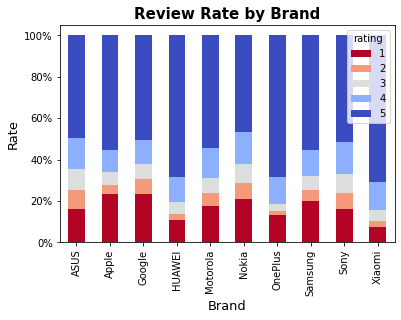

In [13]:
color_map = plt.cm.get_cmap('coolwarm')
df.groupby(['brand','rating']).size().compute().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()).unstack().plot.bar(
    stacked=True, cmap =color_map.reversed())
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title("Review Rate by Brand", size=15, weight="bold")
plt.xlabel("Brand" , size=13)
plt.ylabel("Rate", size=13)

In [14]:
df['opinion']=df['rating'].apply(
    lambda x: 'positive' if x >= 3 else 'negative', meta=float)
df.groupby(['opinion']).size().compute()

opinion
negative    16602
positive    51154
dtype: int64

Text(0.5, 1.0, 'Reviews')

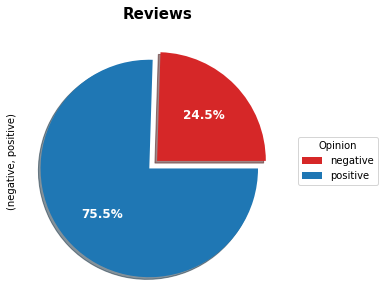

In [15]:
explode = (0, 0.1)
labels='negative','positive'
colors = ['tab:red','tab:blue']
textprops=dict(color="w",size=12, weight="bold")

df.groupby(['opinion']).size().compute().plot.pie(
    explode=explode, label=labels, colors=colors, textprops=textprops,figsize=(
        5, 5), autopct='%1.1f%%', startangle=0, shadow = True)
plt.legend(labels, title="Opinion", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("Reviews", size=15, weight="bold")